# <font color= #9F9FED> **Examen Parcial 3 - Regresión Logística** </font> 

Sofía Maldonado García

Viviana Toledo De la Fuente

Iván Morales

"Y aquí iría le 4to integrante, si tuviéramos une"

In [161]:
# Librerías Generales
import numpy as np
import pandas as pd

# Gráficas
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Modelado
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# Tratamiento de Datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from scipy.stats import boxcox

---

### <font color= #9F9FED> **Modelo Log Reg** </font> 


In [162]:
df = pd.read_csv('data/train_data.csv')
print(f' Tamaño del dataset: {df.shape}')
df

 Tamaño del dataset: (119, 10)


,Age,Sex,TCh,HCh,LCh,Tr,BPS,Sm,Diabetes,Pred
0,50,Male,272,68,188,82,124,Non-smoker,No,High
1,29,Female,275,68,183,84,129,Non-smoker,No,High
2,50,Male,268,55,189,111,119,Non-smoker,No,High
3,78,Female,194,50,120,94,113,Non-smoker,No,High
4,63,Male,229,35,182,214,160,Smoker,Yes,High
...,...,...,...,...,...,...,...,...,...,...
114,74,Female,274,55,192,141,141,Non-smoker,No,Medium
115,72,Female,248,69,163,183,122,Non-smoker,No,Medium
116,35,Male,213,67,121,106,129,Non-smoker,No,Medium
117,57,Female,197,42,131,188,133,Non-smoker,No,Medium


In [163]:
df['Sex'] = pd.get_dummies(df['Sex'], drop_first=True, dtype=float)
df['Diabetes'] = pd.get_dummies(df['Diabetes'], drop_first=True, dtype=float)
df['Sm'] = pd.get_dummies(df['Sm'], drop_first=True, dtype=float)
df

,Age,Sex,TCh,HCh,LCh,Tr,BPS,Sm,Diabetes,Pred
0,50,1.0,272,68,188,82,124,0.0,0.0,High
1,29,0.0,275,68,183,84,129,0.0,0.0,High
2,50,1.0,268,55,189,111,119,0.0,0.0,High
3,78,0.0,194,50,120,94,113,0.0,0.0,High
4,63,1.0,229,35,182,214,160,1.0,1.0,High
...,...,...,...,...,...,...,...,...,...,...
114,74,0.0,274,55,192,141,141,0.0,0.0,Medium
115,72,0.0,248,69,163,183,122,0.0,0.0,Medium
116,35,1.0,213,67,121,106,129,0.0,0.0,Medium
117,57,0.0,197,42,131,188,133,0.0,0.0,Medium


El modelo de Regresión Logística es uno muy usado para tareas de clasificación. Generalmente se utilizaría más para tareas de clasificación binaria (si/no), sin embargo, existe una variación de este modelo llamado *regresión logística multinomial* que nos permite utilizarlo para tareas de clasificación con más de dos posibles respuestas.

In [164]:
x = df.drop(columns='Pred')
y = df['Pred']

X_train, X_test, Y_train, Y_test = train_test_split(x,y,random_state=42, test_size=0.2, stratify=y)

#### <font color= #9F9FED> **Modelo Log Reg, V1 (Estandarización)** </font> 

Este primer modelo va a ser el más sencillo, con el único tratamiento a los datos siendo una estandarización con `StandardScaler` (aparte de la codificación necesaria para trabajar con el modelo).

In [165]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [166]:
logregv1 = LogisticRegression()
logregv1.fit(X_train_scaled, Y_train)

LogisticRegression()

In [167]:
y_pred_v1 = logregv1.predict(X_test_scaled)

##### Primeros Resultados, Modelo V1

In [168]:
# Parámetros
logregv1.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

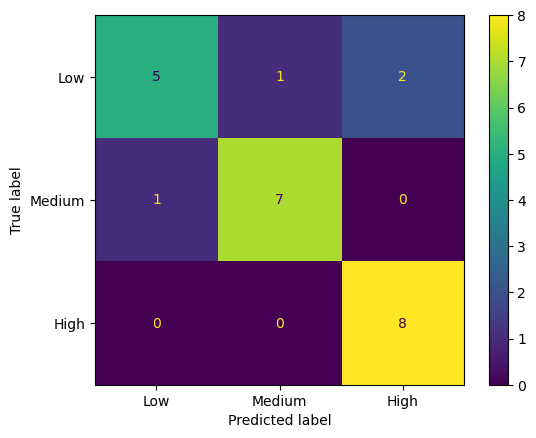

In [169]:
cmv1 = confusion_matrix(Y_test, y_pred_v1)
cmv1_display = ConfusionMatrixDisplay(cmv1, display_labels=['Low', 'Medium', 'High'])
cmv1_display.plot()
plt.show()

Parece que este primer modelo es muy bueno prediciendo la clase de *High*

In [170]:
#Metriacas
print(f"Accuracy: {accuracy_score(Y_test, y_pred_v1)}")
print(f"Precision: {precision_score(Y_test, y_pred_v1, average='weighted')}")
print(f"Recall: {recall_score(Y_test, y_pred_v1, average='weighted')}")
print(f"F1-Score: {f1_score(Y_test, y_pred_v1, average='weighted')}")

Accuracy: 0.8333333333333334
Precision: 0.8361111111111112
Recall: 0.8333333333333334
F1-Score: 0.826058201058201


In [171]:
df_coef_v1 = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coef': logregv1.coef_[0]
})

df_coef_v1

,Feature,Coef
0,Age,-0.192074
1,Sex,0.443444
2,TCh,0.136345
3,HCh,-0.645783
4,LCh,0.052874
5,Tr,0.884278
6,BPS,0.231027
7,Sm,0.385426
8,Diabetes,0.236060


Con esta info, podemos ver que el modelo base es relativamente decente (5/6 para accuracy y Recall) pero claramente tiene espacio de mejora.

También podemos ver que las variables más relevantes (esto lo podemos ver con sus coefficients) son *Tr*, *Sex* y *HCh*

#### <font color= #9F9FED> **Modelo Log Reg, V2 (Estandarización + GridSearch)** </font> 

Para el segundo modelo, aparte de la estandarización previamente hecha, también vamos a utilizar un GridSearch para encontrar los mejores hiperparámetros posibles.

In [ ]:
pipe_v2 = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1','l2', 'elasticnet'],
    'logreg__solver': ['liblinear', 'saga'],
}

gridv2 = GridSearchCV(pipe_v2, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
gridv2.fit(X_train, Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


c:\Users\sofi\miniconda3\envs\EO\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sofi\miniconda3\envs\EO\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sofi\miniconda3\envs\EO\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sofi\miniconda3\envs\EO\Lib\site-packages\sklearn\pipeline.py", line 662, in 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'logreg__penalty': ['l1', 'l2', 'elasticnet'],
                         'logreg__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=2)

In [173]:
#Parámetros
print('Mejores Parámetros:', gridv2.best_params_)
print('Mejor Accuracy: ', gridv2.best_score_)

Mejores Parámetros: {'logreg__C': 0.1, 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}
Mejor Accuracy:  0.6947368421052631


In [174]:
print('Accuracy:', gridv2.score(X_test, Y_test))

Accuracy: 0.6666666666666666


In [175]:
y_pred_v2 = gridv2.predict(X_test)

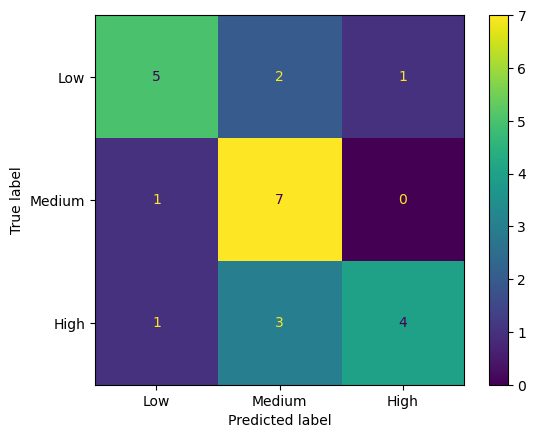

In [176]:
cmv2 = confusion_matrix(Y_test, y_pred_v2)
cmv1_display = ConfusionMatrixDisplay(cmv2, display_labels=['Low', 'Medium', 'High'])
cmv1_display.plot()
plt.show()

In [177]:
#Metriacas
print(f"Accuracy: {accuracy_score(Y_test, y_pred_v2)}")
print(f"Precision: {precision_score(Y_test, y_pred_v2, average='weighted')}")
print(f"Recall: {recall_score(Y_test, y_pred_v2, average='weighted')}")
print(f"F1-Score: {f1_score(Y_test, y_pred_v2, average='weighted')}")

Accuracy: 0.6666666666666666
Precision: 0.6992063492063493
Recall: 0.6666666666666666
F1-Score: 0.6606837606837607
